# Count Circles

## Description

Count the number of circles in the following image


## Group 12

Carlos Emanuel Leite Machado pg53721   
Vasco Manuel Araújo Andrade de Oliveira pg54269

In [2]:
import cv2
# to install cv2 use: pip install opencv-python
import math
import matplotlib.pyplot as plt 
import numpy as np

(648, 702)


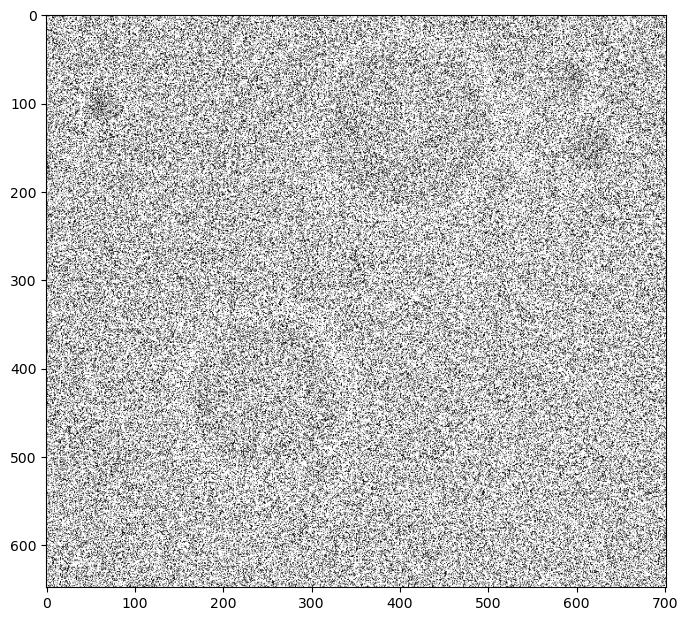

In [3]:
fname = 'Circles-noisy.png'
ini_img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
W,H=ini_img.shape
print(ini_img.shape)
ratio=H/W
fig = plt.figure(figsize=(8,8*ratio))
plt.imshow(ini_img, cmap='gray')

# Suavisar Imagem

Dada a presença significativa de ruídos na imagem fornecida, optamos por reservar esta primeira seção para a aplicação de técnicas de suavização, com o objetivo de tornar a imagem mais clara, facilitando assim a deteção dos círculos.

Ao aplicar o filtro passa baixo da mediana com um tamanho de janela 'm' igual a 7 buscamos reduzir o impacto de ruídos e detalhes indesejados, ajudando, assim, a suavizar a imagem sem desformatar bordas significativas dos círculos.

In [4]:
# OpenCV Median 
m = 7
dImg = cv2.medianBlur(ini_img,m,0)

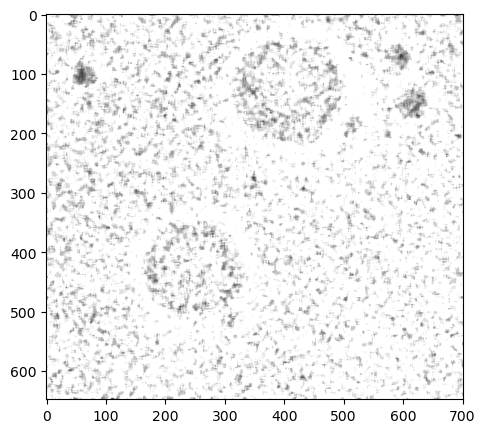

In [5]:
fig = plt.figure(figsize=(15,5))
plt.imshow(dImg, cmap='gray')

De seguida, aplicamos um filtro Gaussian Blur com um kernel de tamanho 'm' igual a 21, utilizando essa técnica para aprimorar a eficácia da próxima operação.

In [6]:
# OpenCV Gaussian Blur 
m= 21
dImg2 = cv2.GaussianBlur(dImg,(m,m),0)

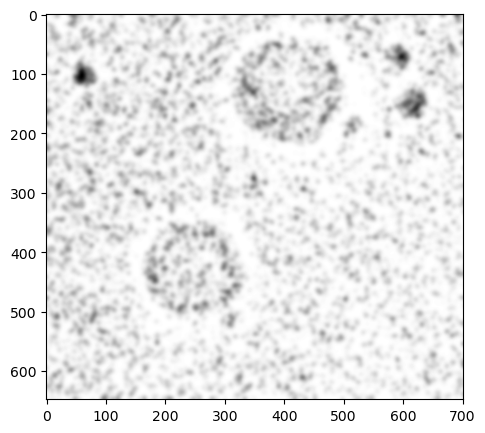

In [7]:
fig = plt.figure(figsize=(15,5))
plt.imshow(dImg2, cmap='gray')

Usando inicialmente o filtro de remoção de ruído local com parâmetros específicos (15, 27, 51), buscamos eleminar o máximo de ruído possível presente na imagem, proporcionando uma representação mais clara e precisa. A repetição subsequente do filtro com parâmetros (5, 27, 51), num total de 4 vezes, acaba por aperfeiçoar ainda mais a imagem, resultando em ainda menos ruído. Após esta operação, a imagem estará pronta para o processo de Thresholding.

In [19]:
# OpenCV Local Denoising Filter 
dImg3 = cv2.fastNlMeansDenoising(dImg2,None,15,27,51)

i = 4
for _ in range(4):
    dImg3 = cv2.fastNlMeansDenoising(dImg3, None, 5, 27, 51)
 

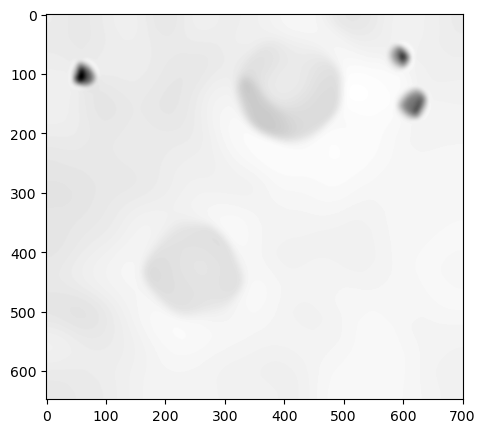

In [20]:
fig = plt.figure(figsize=(15,5))
plt.imshow(dImg3, cmap='gray')

# Thresholding

Esta segunda seção tem como objetivo eliminar quaisquer ambiguidades na imagem, aplicando filtros de thresholding, transformando-a numa representação exclusivamente em preto e branco.

Esta primeira etapa serve para calcular a média e a mediana das cores de todos os pixels na imagem, utilizando essas informações na seguinte operação.

In [10]:
# convert the image representation to SPFP
img_float32 = np.float32(dImg3)

In [11]:
def matrix_average(matrix):
    if len(matrix) == 0 or len(matrix[0]) == 0:
        return 0  # To handle the case of an empty matrix and avoid division by zero

    # Convert the matrix to a NumPy array
    np_matrix = np.array(matrix)

    # Use the np.mean() function to calculate the average
    average = np.mean(np_matrix)

    return average

In [12]:
def matrix_median(matrix):
    if len(matrix) == 0 or len(matrix[0]) == 0:
        return 0  # Para lidar com o caso de uma matriz vazia e evitar a divisão por zero

    # Converter a matriz para um array NumPy
    np_matrix = np.array(matrix)

    # Usar a função np.median() para calcular a mediana
    median_value = np.median(np_matrix)

    return median_value

In [21]:
#Calculo da média e da mediana para usar no threshold minimo de Gthres
print(matrix_average(img_float32))
print(matrix_median(img_float32))

244.95073
246.0


Esta sequência de operações tem como objetivo realizar diferentes técnicas de thresholding e apresentar visualmente os resultados, podendo-se ver qual dará o melhor.    

A primeira operação tráta-se de uma simples técnica de binarização, thresholding global, onde os pixels com intensidade maior que 240 serão brancos (255) e os pixels com intensidade menor ou igual a 240 serão pretos (0), usamos a média das cores dos pixeis da imagem, cálculada na secção anterior, para nos ajudar a descobrir que valor mínimo devíamos usar.

A segunda operação tráta-se de usar o thresholding de Otsu que determina um valor de threshold otimizado, adaptado-se à distribuição de intensidades específica da imagem.

A terceira operação trata-se de usar o thresholding adaptativo, onde o valor de threshold é adaptativo e varia localmente na imagem com base na vizinhança de cada pixel. O tamanho da vizinhança (101) e o parâmetro constante subtraído do valor médio (2), tiveram de ser alterados para termos melhores resultados.

(Text(0.5, 1.0, 'Adaptive Thresholding'), ([], []), ([], []))

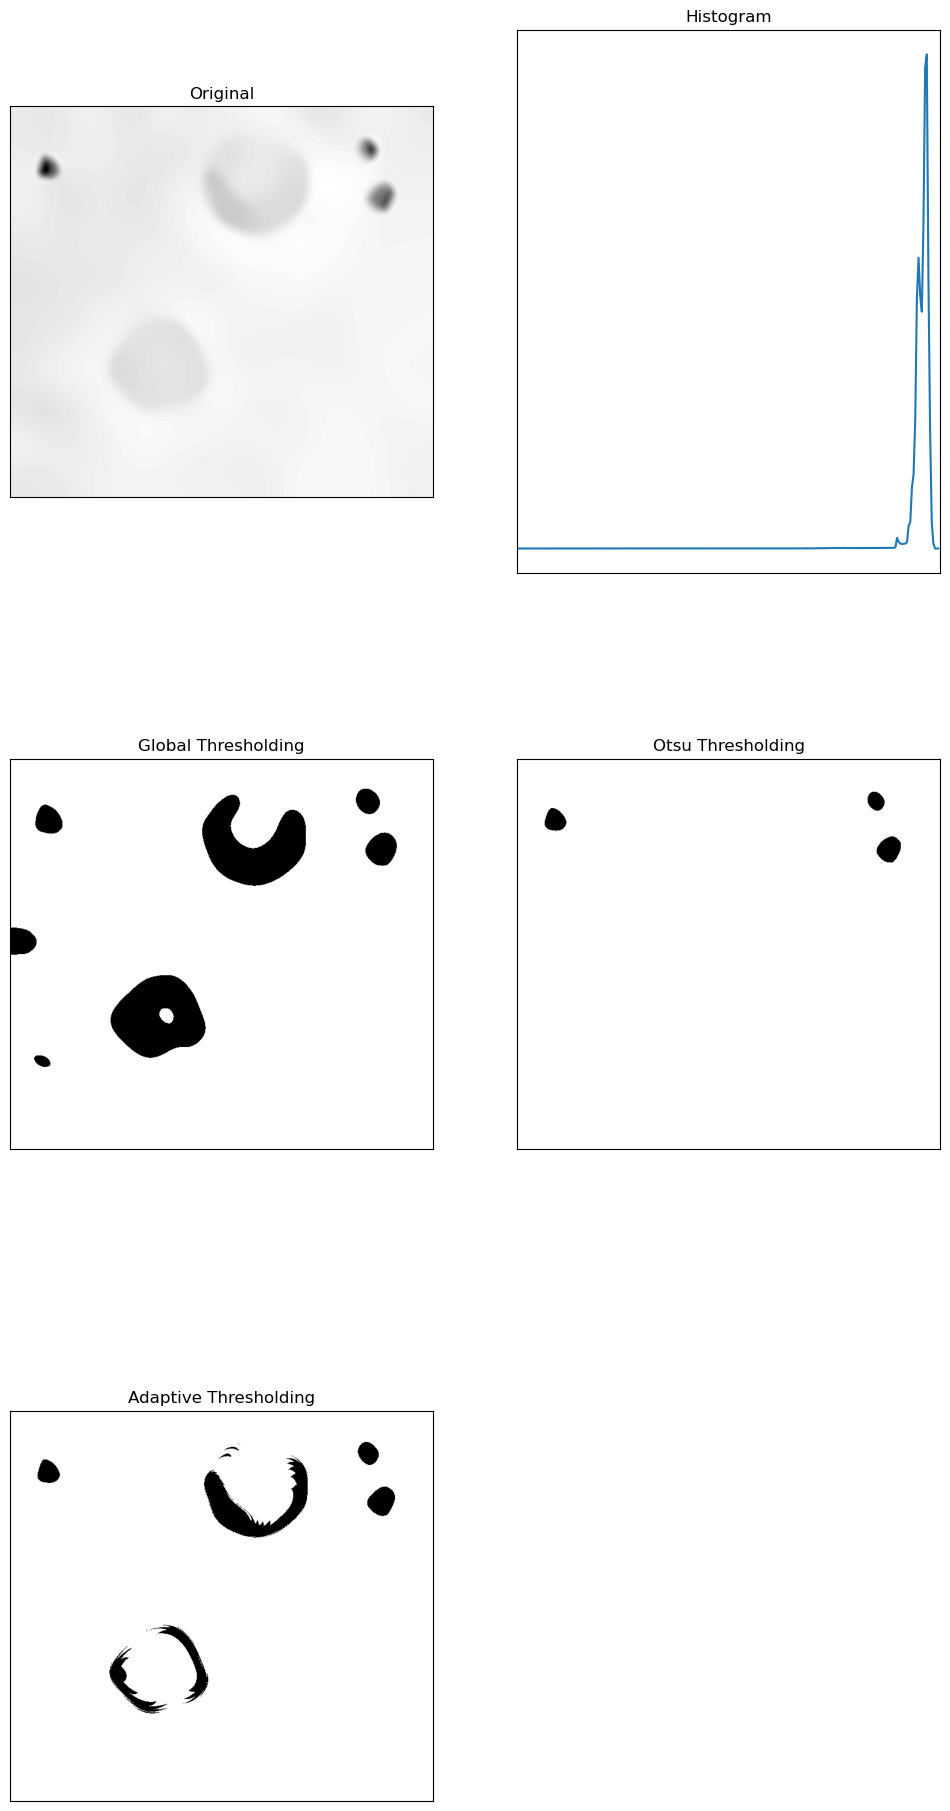

In [14]:
img = dImg3

# histogram
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# Global
ret, Gthres = cv2.threshold(img,240,255,cv2.THRESH_BINARY)

# Otsu thresholding
ret, Othres = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Adaptive Thresholdinh
Athres = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,101,2)

fig = plt.figure(figsize=(12,24))
plt.subplot(3,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.plot(hist),plt.xlim([0,256])
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(Gthres,cmap = 'gray')
plt.title('Global Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(Othres,cmap = 'gray')
plt.title('Otsu Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5),plt.imshow(Athres,cmap = 'gray')
plt.title('Adaptive Thresholding'), plt.xticks([]), plt.yticks([])

# Circle Detection

Nesta fase final realizamos a detecção dos círculos utilizando a transformada de Hough específica para círculos. Essa técnica identifica padrões circulares na imagem, permitindo-nos destacar e visualizar de maneira eficaz essas características específicas. Acabamos por detetar os círculos tanto para a imagem após o thresholding global como para o thresholding de Otsu, acabando por ter melhores resultados com o thresholding global.     
Os parâmetros da transformada de Hough tiveram de ser ajustados, tendo que baixar significativamente a sensibilidade da deteção das bordas dos círculos e aumentar a distância mínima entre os centros dos círculos detetados.       
Concluíndo, estamos confiantes que pelo menos os 5 círculos que detetamos existiam na imagem original, e que, usando o thresholding global e adaptative, conseguimos captar as bordas dos círculos originais.

(Text(0.5, 1.0, 'Hough: detected circles'), ([], []), ([], []))

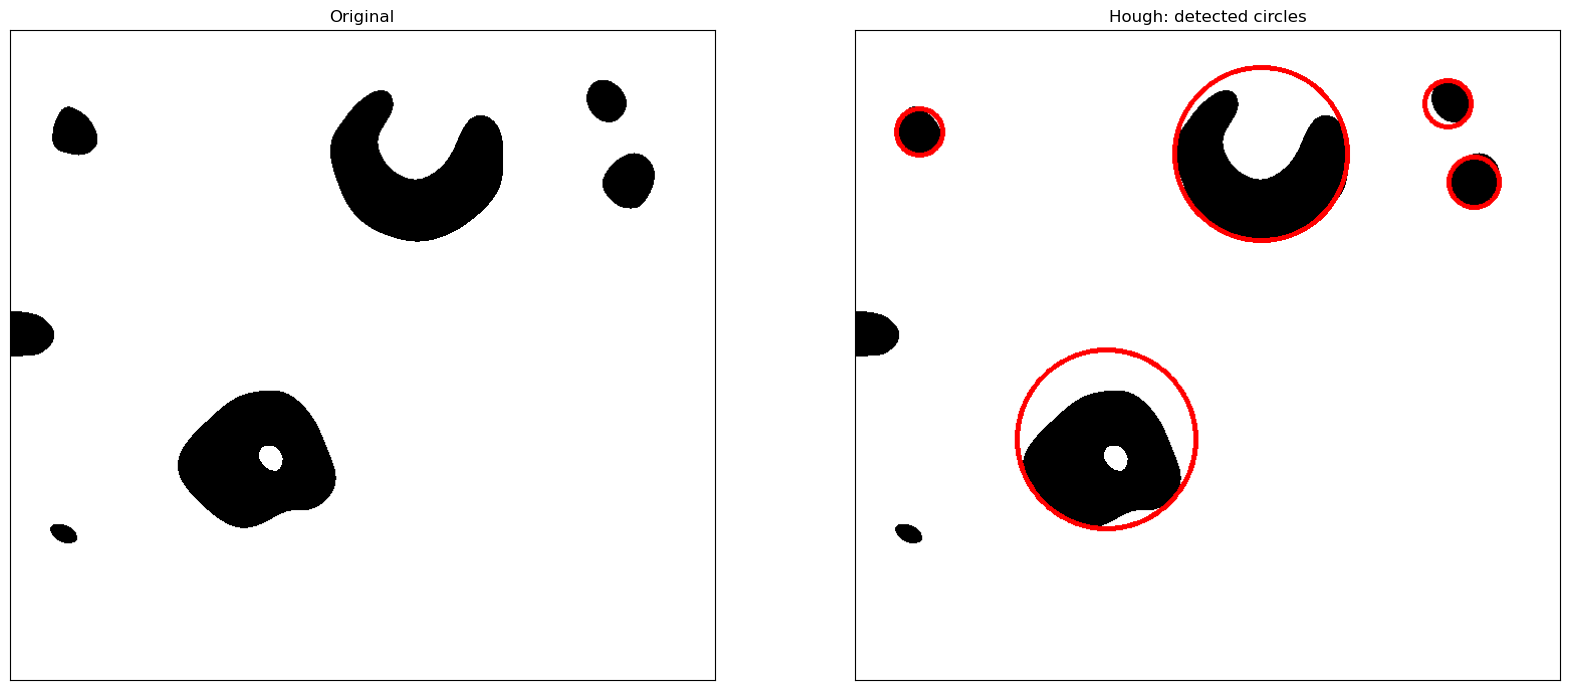

In [15]:
img = Gthres
# HoughCircles(image, method, resolution, min distance between centers, 
#              param1 : Canny upper threshold
#              param2 : how many pixels for a circle)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 75,
                               param1=75, param2=12.5,
                               minRadius=1, maxRadius=150)

# Draw the lines
img_dst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        #cv.circle(img_dst, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_dst, center, radius, (255, 0, 0), 3)
        
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_dst,cmap = 'gray')
plt.title('Hough: detected circles'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Hough: detected circles'), ([], []), ([], []))

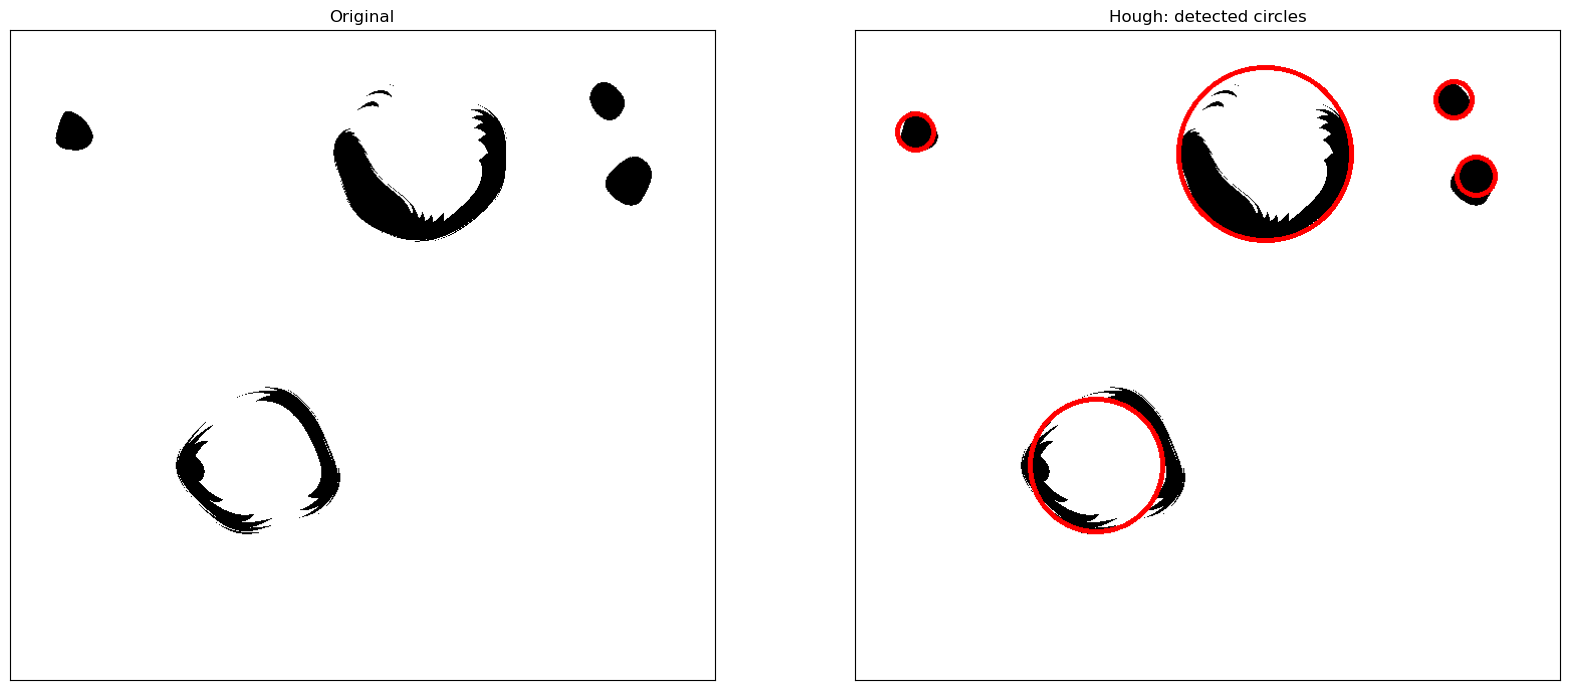

In [16]:
img = Athres
# HoughCircles(image, method, resolution, min distance between centers, 
#              param1 : Canny upper threshold
#              param2 : how many pixels for a circle)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 78,
                               param1=75, param2=14,
                               minRadius=1, maxRadius=150)

# Draw the lines
img_dst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        #cv.circle(img_dst, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_dst, center, radius, (255, 0, 0), 3)
        
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_dst,cmap = 'gray')
plt.title('Hough: detected circles'), plt.xticks([]), plt.yticks([])
